# Assignment 14
This assignment is divided in two parts in which we are asked to model different queues.

## Part 1 - Performance indices of an M/M/1/6 queue

Consider an M/M/1/6 system, with arrival rate $\lambda$ = 0.9 $\frac{j}{s}$, and average service D = 1 s.

In [1]:
l_mm16 = 0.9
D_mm16 = 1
mu_mm16 = 1/D_mm16
rho_mm16 = l_mm16/mu_mm16

### Requests
- Compute the average utilization
- Compute the probability of having 4 jobs in the system
- Compute the average number of jobs in the system
- Compute the throughput and the drop rate
- Compute the average response time and the average time spent in queue
- Compare the previous results with the ones of an M/M/1 system

### Average utilization
To compute the average utilization, we can use the common formula $$U = \sum_{n=1}^{n=6}\pi_{n} = 1-\pi_{0}$$
In this case, the formula solves to be $$U = \frac{\rho-\rho^{k+1}}{1-\rho^{k+1}}$$

The classical formulation of the Utilization $$U = \rho$$ 

is not valid anymore due to the throughput not being $\lambda$ anymore.

In [2]:
U_mm16 = (rho_mm16 - rho_mm16**(7))/(1-rho_mm16**7)
print("The average utilization of the system is {:.4f}".format(U_mm16))

The average utilization of the system is 0.8083


### Probability of having 4 jobs in the system
The probability of having a certain number of jobs in the system can be computed through the formula
$$\begin{equation}
    \pi_{n} =
    \begin{cases}
        \pi_{0}\cdot(\frac{\lambda}{\mu})^{n} &n \leq k\\
        0 & n>k
    \end{cases}
\end{equation}$$

where $$\pi_{0} = \frac{1-\rho}{1-\rho^{k+1}}$$

In [3]:
def prob_mm16(n):
    if n == 0:
        p = (1-rho_mm16)/(1-rho_mm16**7)
    elif n<=6:
        p = prob_mm16(0)*(rho_mm16**n)
    else: p = 0
    return p

print("The probability of having 4 jobs in the system is {:%}".format(prob_mm16(4)))

The probability of having 4 jobs in the system is 12.576118%


### Average number of jobs in the system
The average number of jobs in the system can be computed starting from the usual formulation $$N = \sum_{n=0}^{K}n\cdot\pi_{n}$$

In this case, the computation leads to the formula $$N = \frac{\rho}{1-\rho}-\frac{(K+1)\rho^{K+1}}{1-\rho^{K+1}}$$

In [4]:
N_mm16 = rho_mm16/(1-rho_mm16) - (7*rho_mm16**7)/(1-rho_mm16**7)
print("The average number of jobs in the system is {:.4f}".format(N_mm16))

The average number of jobs in the system is 2.5824


### Throughput and drop rate
To compute the drop rate $D_{r}$ and, therefore, the throughput, we first need to compute the blocking probability $p_{B}$ (or the loss probability $p_{L}$) $$p_{B}=\pi_{K}=\frac{\rho^{K}-\rho^{K+1}}{1-\rho^{K+1}}$$
The drop rate will then be $$D_{r} = \lambda\cdot \pi_{K}$$ and the throughput will be $$X = \lambda - D_{r}$$

In [5]:
pb_mm16 = (rho_mm16**6 - rho_mm16**7)/(1-rho_mm16**7) # I could also use prob_mm16(6)
drop_mm16 = pb_mm16*l_mm16
X_mm16 = l_mm16 - drop_mm16

print("The drop rate of the system is {:.4f}".format(drop_mm16))
print("The average throughput of the system is {:.4f}".format(X_mm16))
#NOTE: the throughput and the utilization are slightly different.

The drop rate of the system is 0.0917
The average throughput of the system is 0.8083


### Response time and average time spent in queue of the system
The response time of the system can be computed by applying little's law $$R = \frac{N}{\lambda\cdot(1-\pi_{K})}$$

The average time spent in queue is, as usual $$\Theta = R - D$$

In [6]:
R_mm16 = N_mm16/(l_mm16*(1-pb_mm16))
theta_mm16 = R_mm16 - D_mm16
print("The average response time of the system is {:.4f}".format(R_mm16))
print("The average queue lenght of the system is {:.4f}".format(theta_mm16))

The average response time of the system is 3.1948
The average queue lenght of the system is 2.1948


### Confrontation with an M/M/1 queue
We need to compare the results obtained with the ones from an M/M/1 system.

#### Utilization

In [7]:
rho_mm1 = l_mm16*D_mm16
U_mm1 = rho_mm1

print("{!s:<13}{!s:<10}{!s:<10}".format("","M/M/1/6","M/M/1"))
print("{!s:<13}{:<10.3f}{:<10.3f}".format("Utilization", U_mm16, U_mm1))

             M/M/1/6   M/M/1     
Utilization  0.808     0.900     


#### Probability of having 4 jobs in the system

In [8]:
def prob_mm1(n):
    return (1-rho_mm1)*(rho_mm1**n)

print("{!s:<8}{!s:<10}{!s:<10}".format("","M/M/1/6","M/M/1"))
print("{!s:<8}{:<10.2%}{:<10.2%}".format("P(n=4)", prob_mm16(4), prob_mm1(4)))

        M/M/1/6   M/M/1     
P(n=4)  12.58%    6.56%     


#### Average number of jobs in the system

In [9]:
N_mm1 = rho_mm1/(1-rho_mm1)

print("{!s:<8}{!s:<10}{!s:<10}".format("","M/M/1/6","M/M/1"))
print("{!s:<8}{:<10.3f}{:<10.3f}".format("N", N_mm16, N_mm1))

        M/M/1/6   M/M/1     
N       2.582     9.000     


#### Response time

In [10]:
R_mm1 = D_mm16/(1-rho_mm1)
theta_mm1 = R_mm1 - D_mm16

print("{!s:<8}{!s:<10}{!s:<10}".format("","M/M/1/6","M/M/1"))
print("{!s:<8}{:<10.3f}{:<10.3f}".format("R", R_mm16, R_mm1))
print("{!s:<8}{:<10.3f}{:<10.3f}".format("Theta", theta_mm16, theta_mm1))


        M/M/1/6   M/M/1     
R       3.195     10.000    
Theta   2.195     9.000     


#### Throughput

In [11]:
X_mm1 = N_mm1/R_mm1

print("{!s:<8}{!s:<10}{!s:<10}".format("","M/M/1/6","M/M/1"))
print("{!s:<8}{:<10.3f}{:<10.3f}".format("X", X_mm16, X_mm1))

        M/M/1/6   M/M/1     
X       0.808     0.900     


## Part 2 - Performance indices of an M/M/2/6 queue
Consider an M/M/2/6 system with arrival rate $\lambda$ = 1.8 $\frac{job}{sec}$, and average service D = 1 s.

In [12]:
l_mm26 = 1.8
D_mm26 = 1
mu_mm26 = 1/D_mm26
rho_mm26 = l_mm26*D_mm26/2

### Requests
- Compute the average utilization
- Compute the probability of having 4 jobs in the system
- Compute the average number of jobs in the system
- Compute the throughput and the drop rate
- Compute the average response time and the average time spent in queue
- Compare the previous results with the ones of an M/M/1 system

### Probability of having 4 jobs in the system
The probability of having a certain number of jobs in the system can be computed through the formula
$$\begin{equation}
    \pi_{n} =
    \begin{cases}
        \frac{\pi_{0}}{n!}\cdot\left(\frac{\lambda}{\mu}\right)^{n} &n \leq c\\
        \frac{\pi_{0}}{c!\cdot c^{n-c}}\cdot\left(\frac{\lambda}{\mu}\right)^{n} &c< n \leq k
    \end{cases}
\end{equation}$$

where $$\pi_{0} = \left[\frac{(c\rho)^{c}}{c!} \frac{1-\rho^{k-c+1}}{1-\rho}+\sum^{c-1}_{j=0}\frac{(c\rho)^{j}}{j!}\right]^{-1}$$

In [13]:
import math as m
def prob_mm26(n):
    if n == 0:
        p = (4*rho_mm26**2/2 * (1-rho_mm26**5)/(1-rho_mm26) + 1 + 2*rho_mm26)**(-1)
    elif n<=2:
        p = prob_mm26(0)/m.factorial(n)*(l_mm26/mu_mm26)**n
    elif n<=6:
        p = prob_mm26(0)/(2*2**(n-2))*(l_mm26/mu_mm26)**n
    else: p = 0
    return p

print("The probability of having 4 jobs in the system is {:%}".format(prob_mm26(4)))

The probability of having 4 jobs in the system is 13.909173%


### Average Utilization
The utilization of the system can be computed by summing up each probability of having a certain number of jobs in the system, each multiplied by the number of cores the system would use
$$ U = \sum^{c}_{i=1}i\cdot\pi_{i} + c\cdot\sum^{k}_{i=c+1}\pi_{i}$$

The average utilization will be this value devided by the number of cores.

In [14]:
U_mm26 = prob_mm26(1)+prob_mm26(2)*2+2*(prob_mm26(3)+prob_mm26(4)+prob_mm26(5)+prob_mm26(6))
print("The utilization of the system will be {:.4f}".format(U_mm26))
print("The average utilization of the system will be {:.4f}".format(U_mm26/2))

The utilization of the system will be 1.5972
The average utilization of the system will be 0.7986


*Since the Utilization I obtain is different than the one obtained by the professor, I tried to simulate the queue in **JMCH**.*

*Below is a screenshot taken from the tool which seems confirm my results (look at the utilization).*
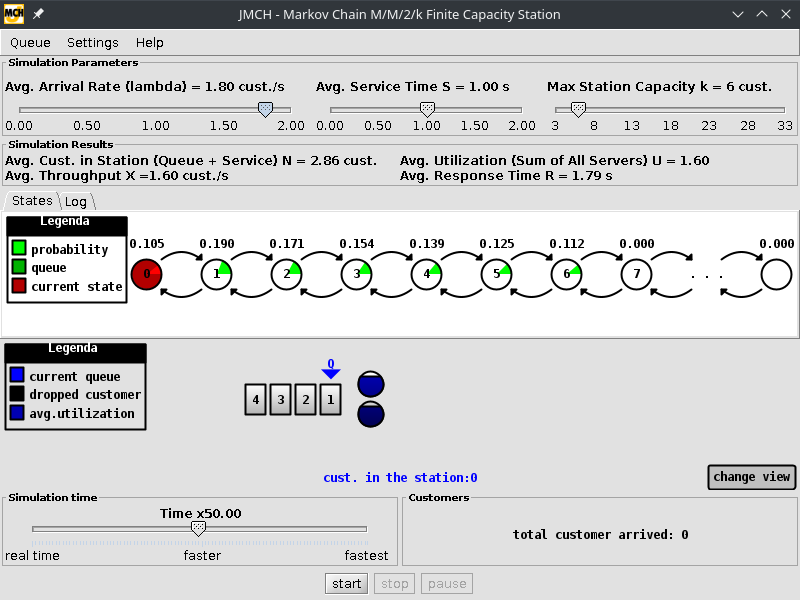

### Average number of jobs in the system
The average number of jobs in the system can be computed starting from the usual formulation $$N = \sum_{n=0}^{K}n\cdot\pi_{n}$$

In [15]:
N_mm26 = prob_mm26(1)+2*prob_mm26(2)+3*prob_mm26(3)+4*prob_mm26(4)+5*prob_mm26(5)+6*prob_mm26(6)
print("The average number of jobs in the system is {:.4f}".format(N_mm26))

The average number of jobs in the system is 2.8561


### Throughput and drop rate
To compute the drop rate $D_{r}$ and, therefore, the throughput, we first need to compute the blocking probability $p_{B}$ (or the loss probability $p_{L}$) 

$$p_{B}=\pi_{K}$$
The drop rate will then be $$D_{r} = \lambda\cdot \pi_{K}$$ and the throughput will be $$X = \lambda - D_{r}$$

In [16]:
pb_mm26 = prob_mm26(6)
drop_mm26 = pb_mm26*l_mm26
X_mm26 = l_mm26 - drop_mm26

print("The drop rate of the system is {:.4f}".format(drop_mm26))
print("The average throughput of the system is {:.4f}".format(X_mm26))
#NOTE: the throughput and the utilization are slightly different.

The drop rate of the system is 0.2028
The average throughput of the system is 1.5972


### Response time and average time spent in queue of the system
The response time of the system can be computed by applying little's law $$R = \frac{N}{\lambda\cdot(1-\pi_{K})}$$

The average time spent in queue is, as usual $$\Theta = R - D$$

In [17]:
R_mm26 = N_mm26/(l_mm26*(1-prob_mm26(6)))
theta_mm26 = R_mm26 - D_mm26
print("The average response time of the system is {:.4f}".format(R_mm26))
print("The average queue length of the system is {:.4f}".format(theta_mm26))

The average response time of the system is 1.7882
The average queue length of the system is 0.7882
